In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
health_file_1_path = 'grouped_data_1.csv'  
health_file_2_path = 'grouped_data_2.csv'  
health_file_3_path = 'grouped_data_3.csv'  
health_file_4_path = 'grouped_data_4.csv'  
stock_file_path = './all_stock_and_etfs.csv'  

## File Path Descriptions:

* health_file_1_path: Percent of students in grades 9-12 who have obesity
* health_file_2_path: Percent of students in grades 9-12 who have an overweight classification
* health_file_3_path: Percent of adults aged 18 years and older who have obesity
* health_file_4_path: Percent of adults aged 18 years and older who have an overweight classification

In [14]:
health_1_df = pd.read_csv(health_file_1_path, low_memory=False)
health_1_df.rename(columns={'YearStart': 'Year'}, inplace=True)
health_1_df

,Year,LocationDesc,Weighted_Data_Value
0,2001,National,10.777437
1,2003,National,12.199633
2,2005,National,13.139717
3,2007,National,13.075449
4,2009,National,11.931245
5,2011,National,13.146012
6,2013,National,13.782396
7,2015,National,13.943990
8,2017,National,14.863031
9,2019,National,15.455182


In [15]:
health_2_df = pd.read_csv(health_file_2_path, low_memory=False)
health_3_df = pd.read_csv(health_file_3_path, low_memory=False)
health_4_df = pd.read_csv(health_file_4_path, low_memory=False)

health_2_df.rename(columns={'YearStart': 'Year'}, inplace=True)
health_3_df.rename(columns={'YearStart': 'Year'}, inplace=True)
health_4_df.rename(columns={'YearStart': 'Year'}, inplace=True)

print(health_2_df)
print(health_3_df)
print(health_4_df)

   Year LocationDesc  Weighted_Data_Value
0  2001     National            13.748787
1  2003     National            14.863256
2  2005     National            15.730217
3  2007     National            15.751022
4  2009     National            15.778499
5  2011     National            15.306942
6  2013     National            16.661326
7  2015     National            16.104525
8  2017     National            15.730232
9  2019     National            16.145239
    Year LocationDesc  Weighted_Data_Value
0   2011     National            27.403164
1   2012     National            27.676900
2   2013     National            28.253890
3   2014     National            28.846556
4   2015     National            28.789366
5   2016     National            29.515772
6   2017     National            30.048435
7   2018     National            30.876317
8   2019     National            31.302005
9   2020     National            31.763344
10  2021     National            32.853809
11  2022     National 

In [11]:
stock_df = pd.read_csv(stock_file_path)
stock_df['Date-Time'] = pd.to_datetime(stock_df['Date-Time'])
stock_df['Year'] = stock_df['Date-Time'].dt.year
stock_df = stock_df[['Year', 'Ticker_Symbol', 'Close']]
stock_df.dropna(inplace=True)

stock_df

,Year,Ticker_Symbol,Close
0,2024,HRL,29.44
1,2024,HRL,28.99
2,2024,HRL,29.11
3,2024,HRL,28.80
4,2024,HRL,28.72
...,...,...,...
163552,1999,ALG,9.50
163553,1999,ALG,9.31
163554,1999,ALG,9.19
163555,1999,ALG,8.88


In [12]:
unique_symbols = stock_df['Ticker_Symbol'].unique()
print("Unique Ticker Symbols:")
print(len(unique_symbols))

unique_symbols

Unique Ticker Symbols:
29


array(['HRL', 'VOO', 'ADM', 'AGCO', 'DIA', 'PEP', 'QSR', 'TSCO', 'ONEQ',
       'PPC', 'CAG', 'DRI', 'HSY', 'CAT', 'SBUX', 'CMG', 'COKE', 'CNHI',
       'SPY', 'DE', 'TSN', 'GIS', 'WEN', 'YUM', 'VMI', 'MCD', 'SAP',
       'DPZ', 'ALG'], dtype=object)

In [13]:
stock_df = stock_df.groupby(['Year', 'Ticker_Symbol']).mean().reset_index()

stock_df

,Year,Ticker_Symbol,Close
0,1999,ADM,12.453953
1,1999,AGCO,12.470930
2,1999,ALG,9.586512
3,1999,CAG,23.396744
4,1999,CAT,49.461860
...,...,...,...
693,2024,TSN,54.222353
694,2024,VMI,230.129706
695,2024,VOO,447.759459
696,2024,WEN,19.127059


## Convert Stocks to Synthetic ETFs

In [16]:
synthetic_etfs = {
    "Food_Beverage_ETF": ["HRL", "ADM", "PEP", "CAG", "HSY", "TSN", "GIS", "COKE", "PPC"],
    "Restaurant_FastFood_ETF": ["QSR", "DRI", "SBUX", "CMG", "WEN", "YUM", "MCD", "DPZ"],
    "Retail_ETF": ["TSCO"],
    "Agri_Machinery_ETF": ["AGCO", "CAT", "DE", "CNHI", "VMI", "ALG"],
    "Investment_Funds_ETF": ["VOO", "DIA", "ONEQ", "SPY"]
}

def calculate_etf_price(year, etf_companies):
    etf_price = stock_df[(stock_df["Year"] == year) & (stock_df["Ticker_Symbol"].isin(etf_companies))]["Close"].sum()
    return etf_price

years = stock_df["Year"].unique()
etf_prices = []

for year in years:
    for etf_name, companies in synthetic_etfs.items():
        etf_price = calculate_etf_price(year, companies)
        etf_prices.append({"Year": year, "Ticker_Symbol": etf_name, "Close": etf_price})

etf_df = pd.DataFrame(etf_prices)

etf_df

,Year,Ticker_Symbol,Close
0,1999,Food_Beverage_ETF,280.142791
1,1999,Restaurant_FastFood_ETF,148.210233
2,1999,Retail_ETF,16.530930
3,1999,Agri_Machinery_ETF,129.017907
4,1999,Investment_Funds_ETF,251.812916
...,...,...,...
125,2024,Food_Beverage_ETF,1507.900882
126,2024,Restaurant_FastFood_ETF,3598.826765
127,2024,Retail_ETF,228.057794
128,2024,Agri_Machinery_ETF,1259.740882


## Merge ETFs with Health Metrics

In [19]:
def merge_datasets(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index='Year', columns='Ticker_Symbol', values='Close').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on='Year', how='inner')
    return merged_data

merged_1_df = merge_datasets(health_1_df, etf_df)
merged_2_df = merge_datasets(health_2_df, etf_df)
merged_3_df = merge_datasets(health_3_df, etf_df)
merged_4_df = merge_datasets(health_4_df, etf_df)

print(merged_2_df)
print(merged_3_df)
print(merged_4_df)

merged_1_df

   Year LocationDesc  Weighted_Data_Value  Agri_Machinery_ETF  \
0  2001     National            13.748787          130.227460   
1  2003     National            14.863256          162.217698   
2  2005     National            15.730217          209.005397   
3  2007     National            15.751022          335.076215   
4  2009     National            15.778499          192.298016   
5  2011     National            15.306942          344.579008   
6  2013     National            16.661326          429.103965   
7  2015     National            16.104525          390.638889   
8  2017     National            15.730232          556.947729   
9  2019     National            16.145239          613.085476   

   Food_Beverage_ETF  Investment_Funds_ETF  Restaurant_FastFood_ETF  \
0         274.028024            221.964567               149.906371   
1         296.241048            264.534740               117.394341   
2         345.688517            309.117206               197.923468   


,Year,LocationDesc,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,2001,National,10.777437,130.227460,274.028024,221.964567,149.906371,19.274291
1,2003,National,12.199633,162.217698,296.241048,264.534740,117.394341,41.563901
2,2005,National,13.139717,209.005397,345.688517,309.117206,197.923468,46.497044
3,2007,National,13.075449,335.076215,381.619233,380.833298,298.694042,48.051913
4,2009,National,11.931245,192.298016,298.652738,256.591413,228.613929,42.359365
5,2011,National,13.146012,344.579008,330.002440,409.900663,541.906769,62.210835
6,2013,National,13.782396,429.103965,431.914014,544.478210,747.108615,100.741679
7,2015,National,13.943990,390.638889,606.007917,765.388137,1125.896825,87.509544
8,2017,National,14.863031,556.947729,692.402131,932.296721,1002.210837,63.274223
9,2019,National,15.455182,613.085476,812.510000,1134.157936,1573.749405,98.228016


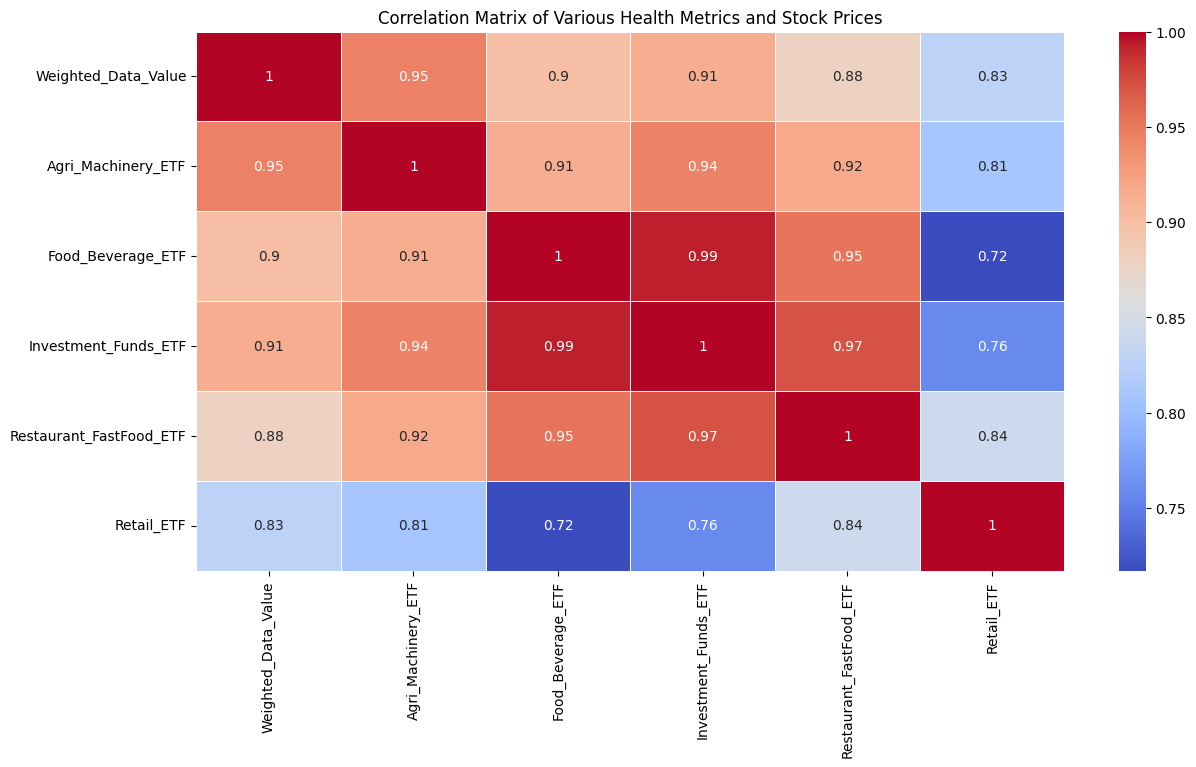

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,0.945321,0.899848,0.914026,0.877886,0.827010
Agri_Machinery_ETF,0.945321,1.000000,0.914542,0.943806,0.917825,0.809840
Food_Beverage_ETF,0.899848,0.914542,1.000000,0.992756,0.952759,0.717155
Investment_Funds_ETF,0.914026,0.943806,0.992756,1.000000,0.971984,0.758259
Restaurant_FastFood_ETF,0.877886,0.917825,0.952759,0.971984,1.000000,0.842080
Retail_ETF,0.827010,0.809840,0.717155,0.758259,0.842080,1.000000


In [20]:
def plt_corr_matrix(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'])    
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(14, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Various Health Metrics and Stock Prices')
    plt.show()
    
    return corr_matrix

corr_1_matrix = plt_corr_matrix(merged_1_df)

corr_1_matrix

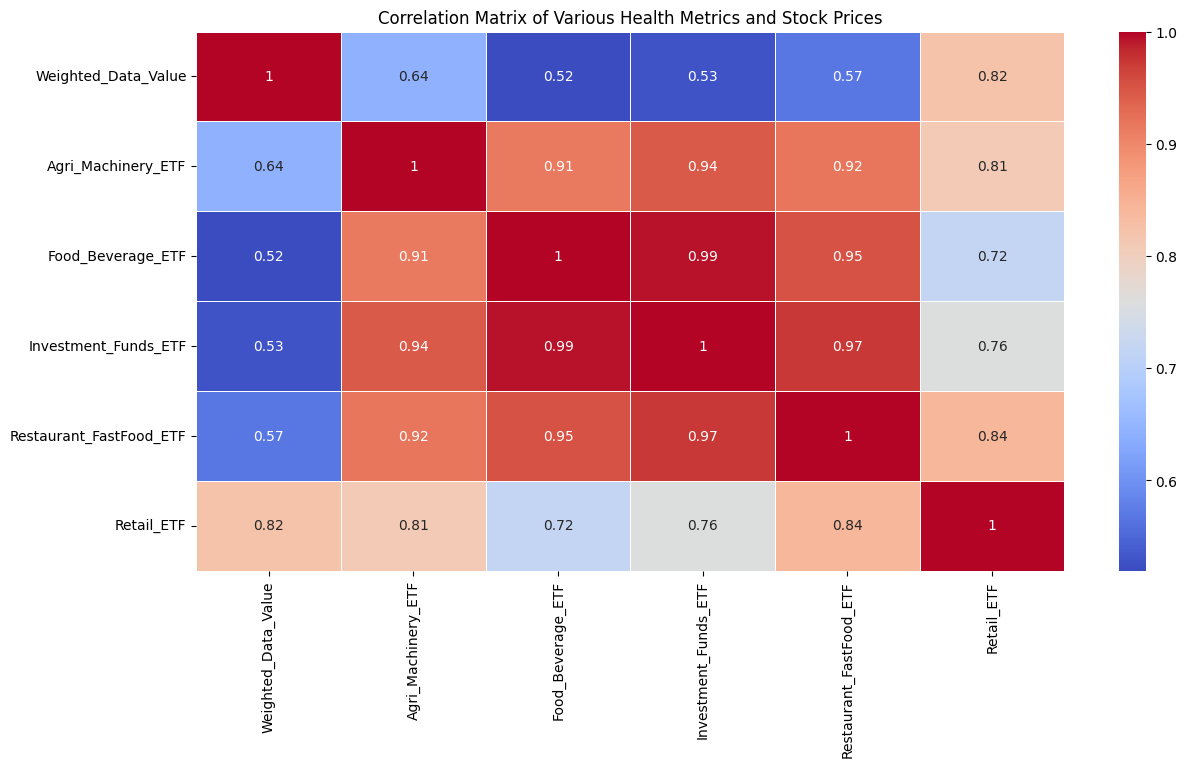

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,0.643065,0.519575,0.528917,0.567055,0.822399
Agri_Machinery_ETF,0.643065,1.000000,0.914542,0.943806,0.917825,0.809840
Food_Beverage_ETF,0.519575,0.914542,1.000000,0.992756,0.952759,0.717155
Investment_Funds_ETF,0.528917,0.943806,0.992756,1.000000,0.971984,0.758259
Restaurant_FastFood_ETF,0.567055,0.917825,0.952759,0.971984,1.000000,0.842080
Retail_ETF,0.822399,0.809840,0.717155,0.758259,0.842080,1.000000


In [21]:
corr_2_matrix = plt_corr_matrix(merged_2_df)

corr_2_matrix

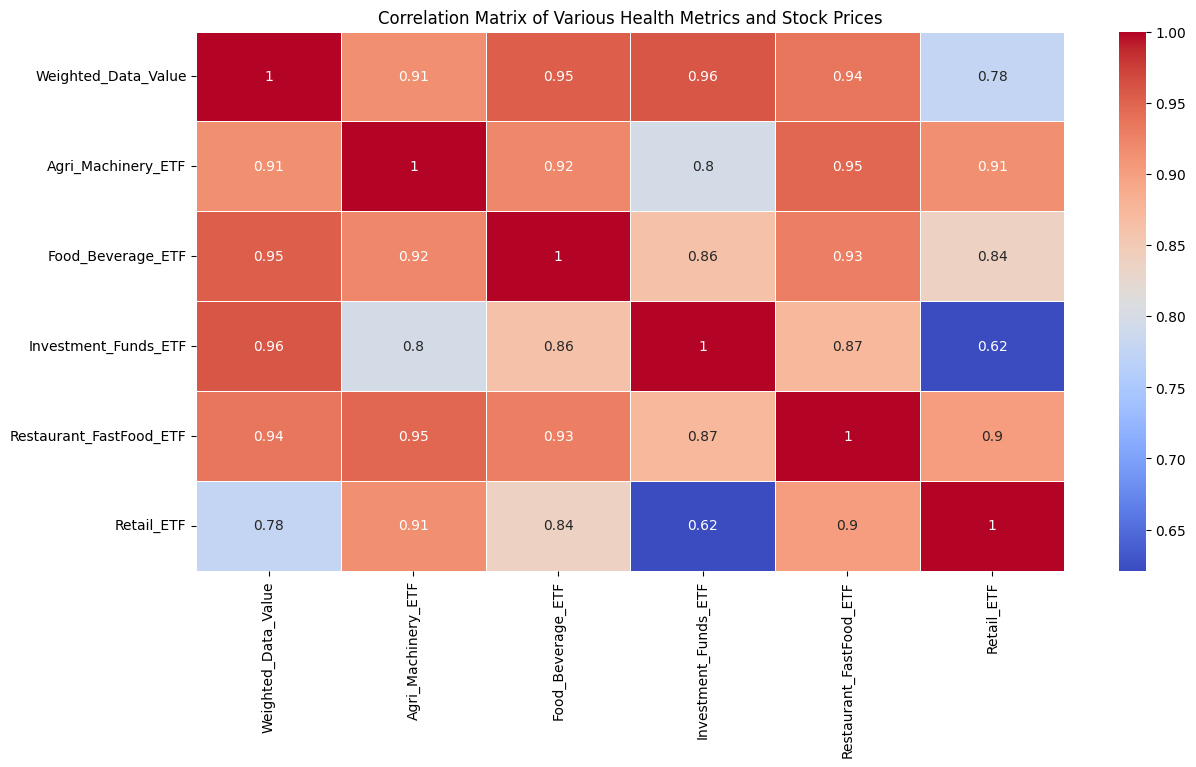

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,0.914790,0.953843,0.959045,0.935220,0.776924
Agri_Machinery_ETF,0.914790,1.000000,0.921145,0.796383,0.947376,0.914246
Food_Beverage_ETF,0.953843,0.921145,1.000000,0.862322,0.928124,0.837565
Investment_Funds_ETF,0.959045,0.796383,0.862322,1.000000,0.873761,0.621223
Restaurant_FastFood_ETF,0.935220,0.947376,0.928124,0.873761,1.000000,0.901733
Retail_ETF,0.776924,0.914246,0.837565,0.621223,0.901733,1.000000


In [22]:
corr_3_matrix = plt_corr_matrix(merged_3_df)

corr_3_matrix

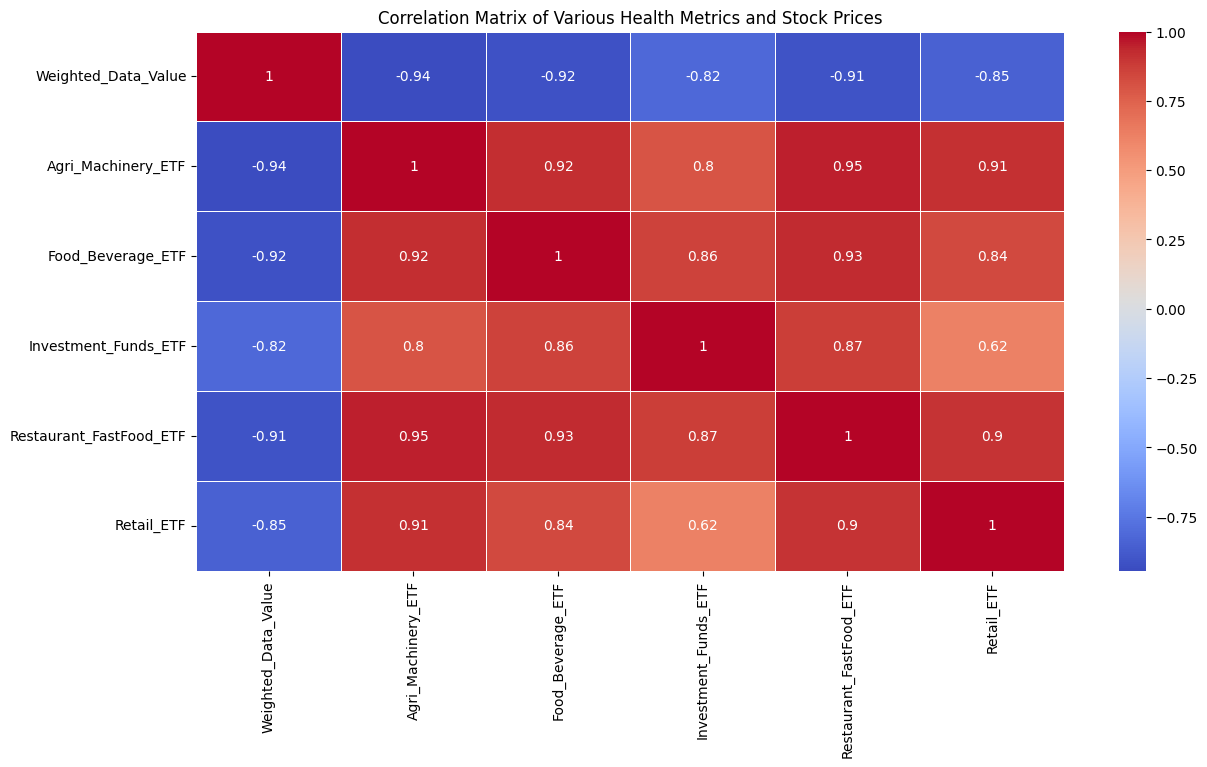

,Weighted_Data_Value,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Weighted_Data_Value,1.000000,-0.944036,-0.915481,-0.817144,-0.912094,-0.847731
Agri_Machinery_ETF,-0.944036,1.000000,0.921145,0.796383,0.947376,0.914246
Food_Beverage_ETF,-0.915481,0.921145,1.000000,0.862322,0.928124,0.837565
Investment_Funds_ETF,-0.817144,0.796383,0.862322,1.000000,0.873761,0.621223
Restaurant_FastFood_ETF,-0.912094,0.947376,0.928124,0.873761,1.000000,0.901733
Retail_ETF,-0.847731,0.914246,0.837565,0.621223,0.901733,1.000000


In [23]:
corr_4_matrix = plt_corr_matrix(merged_4_df)

corr_4_matrix

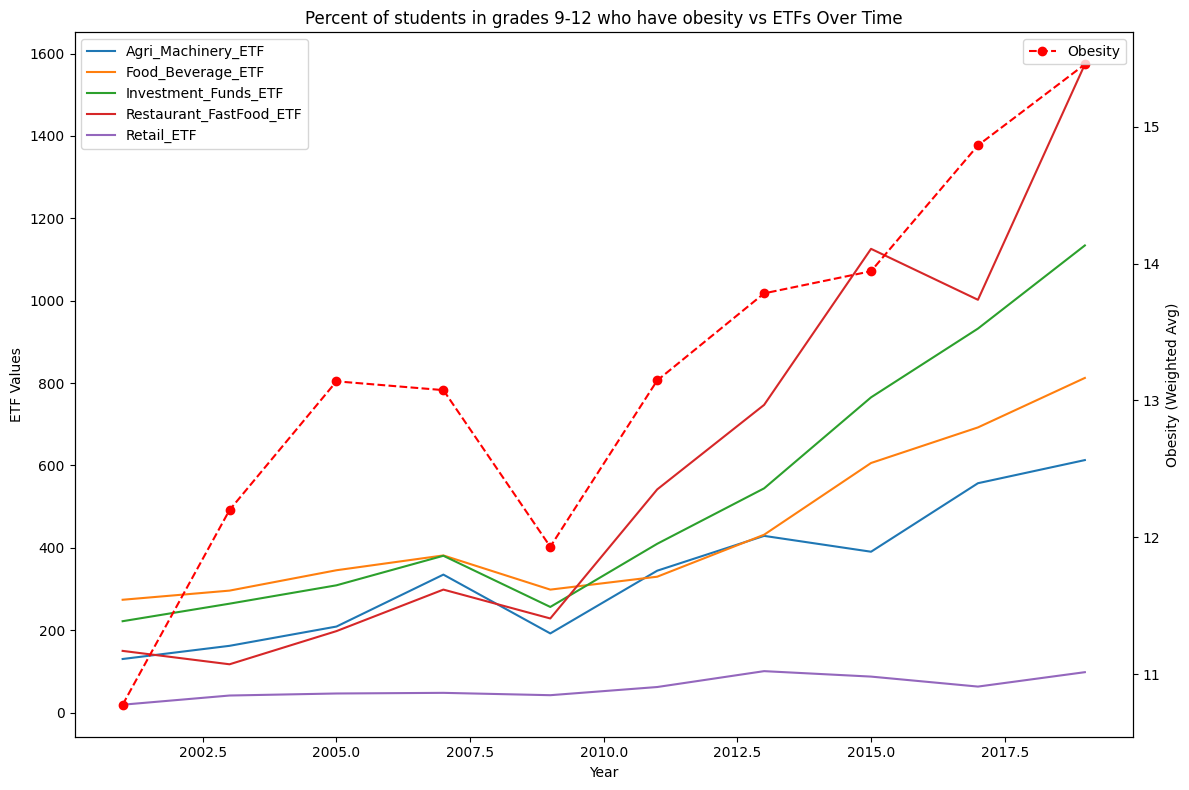

In [28]:
synth_etfs = ["Agri_Machinery_ETF", "Food_Beverage_ETF", "Investment_Funds_ETF", "Restaurant_FastFood_ETF", "Retail_ETF"]

fig, ax = plt.subplots(figsize=(12, 8))

for etf in synth_etfs:
    ax.plot(merged_1_df["Year"], merged_1_df[etf], label=etf)

ax2 = ax.twinx()
ax2.plot(merged_1_df["Year"], merged_1_df["Weighted_Data_Value"], label="Obesity", color='red', linestyle='--', marker='o')

ax.set_xlabel("Year")
ax.set_ylabel("ETF Values")
ax2.set_ylabel("Obesity (Weighted Avg)")
ax.set_title("Percent of students in grades 9-12 who have obesity vs ETFs Over Time")

etf_labels = synth_etfs + ["Obesity"]
ax.legend(loc="upper left")
ax2.legend(loc="upper right", labels=["Obesity"])

plt.tight_layout()
plt.show()

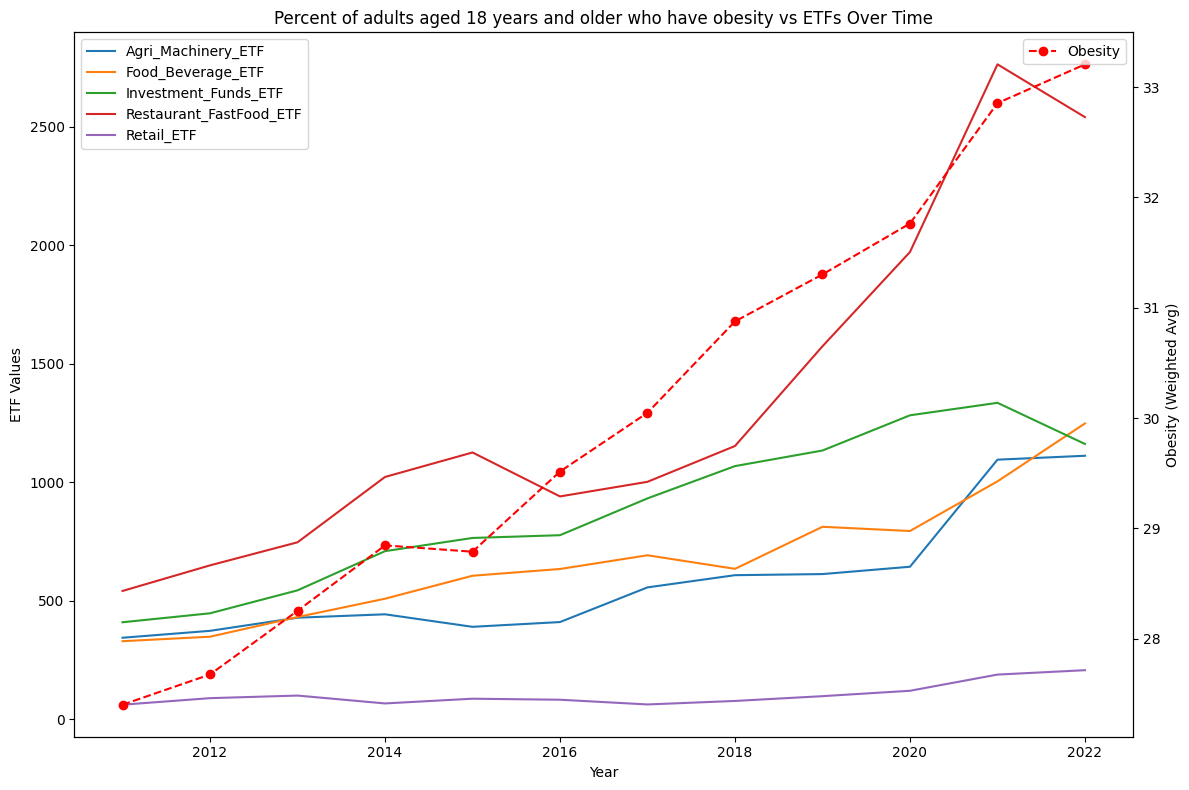

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

for etf in synth_etfs:
    ax.plot(merged_3_df["Year"], merged_3_df[etf], label=etf)

ax2 = ax.twinx()
ax2.plot(merged_3_df["Year"], merged_3_df["Weighted_Data_Value"], label="Obesity", color='red', linestyle='--', marker='o')

ax.set_xlabel("Year")
ax.set_ylabel("ETF Values")
ax2.set_ylabel("Obesity (Weighted Avg)")
ax.set_title("Percent of adults aged 18 years and older who have obesity vs ETFs Over Time")

etf_labels = synth_etfs + ["Obesity"]
ax.legend(loc="upper left")
ax2.legend(loc="upper right", labels=["Obesity"])

plt.tight_layout()
plt.show()